In [161]:
%pip install matplotlib
%pip install tqdm
%pip install pandas

import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from sklearn import preprocessing
from sklearn.decomposition import PCA
from scipy import stats
import numpy as np
import pandas as pd
import os

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [207]:
#Extract the 
features_data = pd.read_pickle("features.pkl")
#print(features_data[["label", "subject"]])

features_data_turncated = features_data.drop(columns=['label', 'subject'])

#features_data_turncated = features_data[["Mean_ecg", "mean_EDA", "WL_emg", "SSC_emg", "MAL_emg", "MCI_emg", "Mean_emg" "Median_emg", "STD_emg", "Mode_emg"]]
#features_data["Mean_ecg"] = preprocessing.normalize()

#x = features_data_turncated.values
#min_max_scaler = preprocessing.MinMaxScaler()
#x_scaled = min_max_scaler.fit_transform(x)
#features_data_N = pd.DataFrame(x_scaled, index=features_data.index, columns=features_data_turncated.columns)

scaler = preprocessing.StandardScaler()
features_data_scaled = scaler.fit_transform(features_data_turncated)

#features_data_N = pd.concat([features_data_N, features_data[["label", "subject"]]], axis=1).reindex(features_data_N.index)

print(features_data_turncated)

      HRV_RMSSD  HRV_pNN50  HRV_pNN20  ECG_Mean  ECG_Median   ECG_STD  \
0    105.719112  44.444444  75.308642  0.000065    0.004028  0.138177   
1     78.774441  32.857143  65.714286  0.000156   -0.016569  0.153317   
2     73.133812  36.986301  73.972603  0.000146   -0.007233  0.182672   
3     57.116065  32.394366  71.830986  0.000142   -0.007799  0.143739   
4     83.741894  34.722222  68.055556  0.000080   -0.008144  0.142714   
..          ...        ...        ...       ...         ...       ...   
700  100.223467  56.716418  76.119403 -0.000200    0.003745  0.137908   
701  110.112229  50.000000  66.176471 -0.000117    0.006527  0.132340   
702  101.277859  47.761194  79.104478 -0.000101    0.006182  0.128651   
703   88.442987  49.230769  81.538462  0.000044    0.007703  0.126626   
704   87.368694  48.387097  85.483871  0.000062    0.006795  0.125215   

     ECG_Mode  EDA_onset  EDA_recovery    EDA_RR  ...   EDA_STD  EDA_Mode  \
0   -0.435590   1.312990      1.649156  0.0001

In [208]:
pca = PCA(n_components=10)
pca_features = pca.fit_transform(features_data_turncated)
# pca_features = features_data_turncated
print(pca_features)

[[-3.87245670e+02  2.52741737e+01  3.82137291e+00 ... -1.91521190e-01
  -3.12190254e-01 -2.96902211e-02]
 [-1.13286692e+01 -6.19244221e+00  7.83444664e+00 ... -1.44408774e-01
   2.43525956e-01 -7.86795754e-03]
 [-7.08304935e+02 -6.62311652e+00 -3.73241629e+00 ...  7.65155415e-01
  -4.96979928e-02  6.10860898e-03]
 ...
 [ 1.02475692e+03  1.99783796e+01 -1.84434787e-02 ...  8.53015652e-03
  -4.88425486e-02  6.67647358e-02]
 [ 1.98973974e+03  6.94239054e+00 -5.43641999e+00 ...  4.98561939e-02
  -1.34956138e-01  4.51696612e-02]
 [ 1.93374985e+03  6.59417177e+00 -8.21205817e+00 ... -2.30639402e-02
  -1.84304187e-02  4.36665605e-02]]


In [209]:
from sklearn.model_selection import train_test_split
print(np.shape(pca_features))
#Split the data into a train and test set
X_train, x_test, Y_train, y_test = train_test_split(pca_features, features_data_N["label"], test_size=0.3,shuffle=True, random_state=102)
print(np.shape(x_test))
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
x_test = scaler.transform(x_test)

(705, 10)
(212, 10)


In [210]:
y_test

74     2
106    1
179    4
137    4
136    4
      ..
341    1
372    4
658    1
641    3
209    2
Name: label, Length: 212, dtype: int64

features_data_N["label"]


In [203]:
features_data_N["label"]


0      1
1      1
2      1
3      1
4      1
      ..
700    4
701    4
702    4
703    4
704    4
Name: label, Length: 705, dtype: int64

Below the train data is fitted using the following classifiers: Random Forest Classifier, Random Forest Regressor, Decision Tree Regressor, Support Vector Machine, Neural Support Vector Machine, Linear Regression, Bernoulli

In [211]:
#Import classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import NuSVC,SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import BernoulliNB

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score,confusion_matrix

#Fit data using classifiers and calculate accuracy
#Random Forest Classifier
classifier_RFC = RandomForestClassifier()
classifier_RFC.fit(X_train, Y_train)
y_pred_RFC = classifier_RFC.predict(x_test)
accuracy_RFC = accuracy_score(y_test, y_pred_RFC)
mse_RFC = mean_squared_error(y_test, y_pred_RFC)

#Decision Tree Regressor
classifier_DTC = DecisionTreeClassifier(max_depth=3)
classifier_DTC.fit(X_train, Y_train)
y_pred_DTC = classifier_DTC.predict(x_test)
accuracy_DTC = accuracy_score(y_test, y_pred_DTC)
mse_DTC = mean_squared_error(y_test, y_pred_DTC)

#Support Vector Machine
classifier_SVM = SVC(kernel='rbf')
classifier_SVM.fit(X_train, Y_train)
y_pred_SVM = classifier_SVM.predict(x_test)
accuracy_SVM = accuracy_score(y_test, y_pred_SVM)
mse_SVM = mean_squared_error(y_test, y_pred_SVM)

#Neural Support Vector Machine
#classifier_NSVM = NuSVC(kernel='linear')
#classifier_NSVM.fit(X_train, Y_train)
#y_pred_NSVM = classifier_NSVM.predict(x_test)
#accuracy_NSVM = accuracy_score(y_test, y_pred_NSVM)
#mse_NSVM = mean_squared_error(y_test, y_pred_NSVM)

#Linear Discriminant Analysis
classifier_LDA = LinearDiscriminantAnalysis()
classifier_LDA.fit(X_train, Y_train)
y_pred_LDA = classifier_LDA.predict(x_test)
accuracy_LDA = accuracy_score(y_test, y_pred_LDA)
mse_LDA = mean_squared_error(y_test, y_pred_LDA)

#Bernoulli
classifier_BNB = BernoulliNB()
classifier_BNB.fit(X_train, Y_train)
y_pred_BNB = classifier_BNB.predict(x_test)
accuracy_BNB = accuracy_score(y_test, y_pred_BNB)
mse_BNB = mean_squared_error(y_test, y_pred_BNB)

print("{} Accuracy, MSE: {:.2f}%, {:.2f}".format('Random Forrest Classifier', accuracy_RFC*100, mse_RFC))
print("{} Accuracy, MSE: {:.2f}%, {:.2f}".format('Decision Tree Regressor', accuracy_DTC*100, mse_DTC))
print("{} Accuracy, MSE: {:.2f}%, {:.2f}".format('Support Vector Machine', accuracy_SVM*100, mse_SVM))
#print("{} Accuracy, MSE: {:.2f}%, {:.2f}".format('Neural Support Vector Machine', accuracy_NSVM*100, mse_NSVM))
print("{} Accuracy, MSE: {:.2f}%, {:.2f}".format('Linear Discriminant Analysis', accuracy_LDA*100, mse_LDA))
print("{} Accuracy, MSE: {:.2f}%, {:.2f}".format('Bernoulli', accuracy_BNB*100, mse_BNB))

Random Forrest Classifier Accuracy, MSE: 100.00%, 0.00
Decision Tree Regressor Accuracy, MSE: 88.21%, 0.50
Support Vector Machine Accuracy, MSE: 100.00%, 0.00
Linear Discriminant Analysis Accuracy, MSE: 87.26%, 0.13
Bernoulli Accuracy, MSE: 70.75%, 1.21


In [205]:
confusion_matrix(y_test, y_pred_RFC)

array([[84,  0,  0,  0],
       [ 0, 43,  0,  0],
       [ 0,  0, 29,  0],
       [ 0,  0,  0, 56]], dtype=int64)

In [184]:
classifier_RFC = RandomForestClassifier()
classifier_RFC.fit(X_train, Y_train)
y_pred_RFC = classifier_RFC.predict(x_test)
accuracy_RFC = accuracy_score(y_test, y_pred_RFC)

In [185]:
accuracy_RFC

1.0

In [183]:
Y_train

303    2
198    1
326    4
635    2
467    4
      ..
45     4
626    1
242    1
590    2
256    2
Name: label, Length: 493, dtype: int64

In [177]:
y_test

74     2
106    1
179    4
137    4
136    4
      ..
341    1
372    4
658    1
641    3
209    2
Name: label, Length: 212, dtype: int64

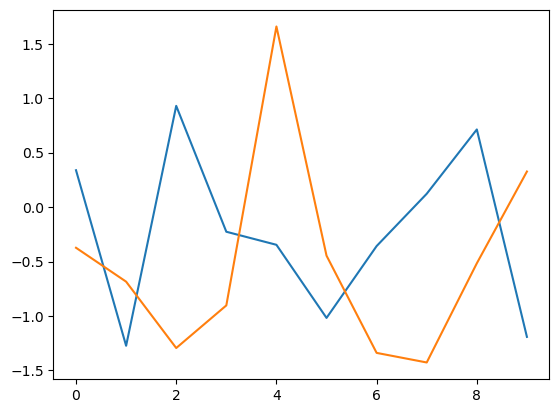

In [181]:
plt.plot(X_train[0])
plt.plot(x_test[0])